In [211]:
import sys
import os
sys.path.append(os.path.abspath("D:\\Python\\commodity_futures_price"))

import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from statsmodels.stats.diagnostic import lilliefors

### Read the Files of Commodities

In [209]:
df_dict = {}
valid_dates = pd.date_range(start="2011-01-01", end="2024-12-31", freq="B")
# Read each file in below folder
path = "../data/raw/"
files = os.listdir(path)
for file in files:
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(path, file), index_col=0, parse_dates=True)
        # df["Return"] = df.iloc[:, 0:1].apply(lambda x: np.log(x.shift(-1) / x))
        df = df.dropna()

        non_positive_LA = df[(df[df.columns[0]] <= 0) | (df['Volatility'] <= 0)]
        df = df.drop(index=non_positive_LA.index)

        df_dict[file[:-4]] = df
        valid_dates = valid_dates.intersection(df.index)
for name, df in df_dict.items():
    df_dict[name] = df[df.index.isin(valid_dates)]

### Data Cleaning

There are some dataframes with price data haven't change for a period.

In [207]:
for name, df in df_dict.items():
    for i in range(len(df) - 1):
        if df.iloc[i, 0:1].values[0] == df.iloc[i + 1, 0:1].values[0]:
            print(f"Price for {name} is constant at {df.index[i]}.")

Price for BO is constant at 2017-07-31 00:00:00.
Price for CC is constant at 2014-07-31 00:00:00.
Price for DA is constant at 2015-04-30 00:00:00.
Price for DA is constant at 2023-11-30 00:00:00.
Price for DA is constant at 2023-12-29 00:00:00.
Price for LA is constant at 2019-06-28 00:00:00.
Price for LB is constant at 2023-05-31 00:00:00.
Price for LB is constant at 2023-06-30 00:00:00.
Price for LB is constant at 2023-07-31 00:00:00.
Price for LB is constant at 2023-08-31 00:00:00.
Price for LB is constant at 2023-09-29 00:00:00.
Price for LB is constant at 2023-10-31 00:00:00.
Price for LB is constant at 2023-11-30 00:00:00.
Price for LB is constant at 2023-12-29 00:00:00.
Price for LB is constant at 2024-01-31 00:00:00.
Price for LB is constant at 2024-02-29 00:00:00.
Price for LB is constant at 2024-03-29 00:00:00.
Price for LB is constant at 2024-04-30 00:00:00.
Price for LC is constant at 2018-12-31 00:00:00.
Price for LC is constant at 2024-03-29 00:00:00.
Price for LH is cons

Manual Check by investing.com:  
- Correct: BO, CC, DA, LA, LC, LH, SB, SM
- Incorrect: LB

### EDA

Here take the first dataframe to have a glance on the data.

In [12]:
BO = df_dict["BO"]
returns = BO.iloc[:, 0:1].apply(lambda x: x.shift(-1) / x)
log_returns = returns.apply(lambda x: np.log(x))

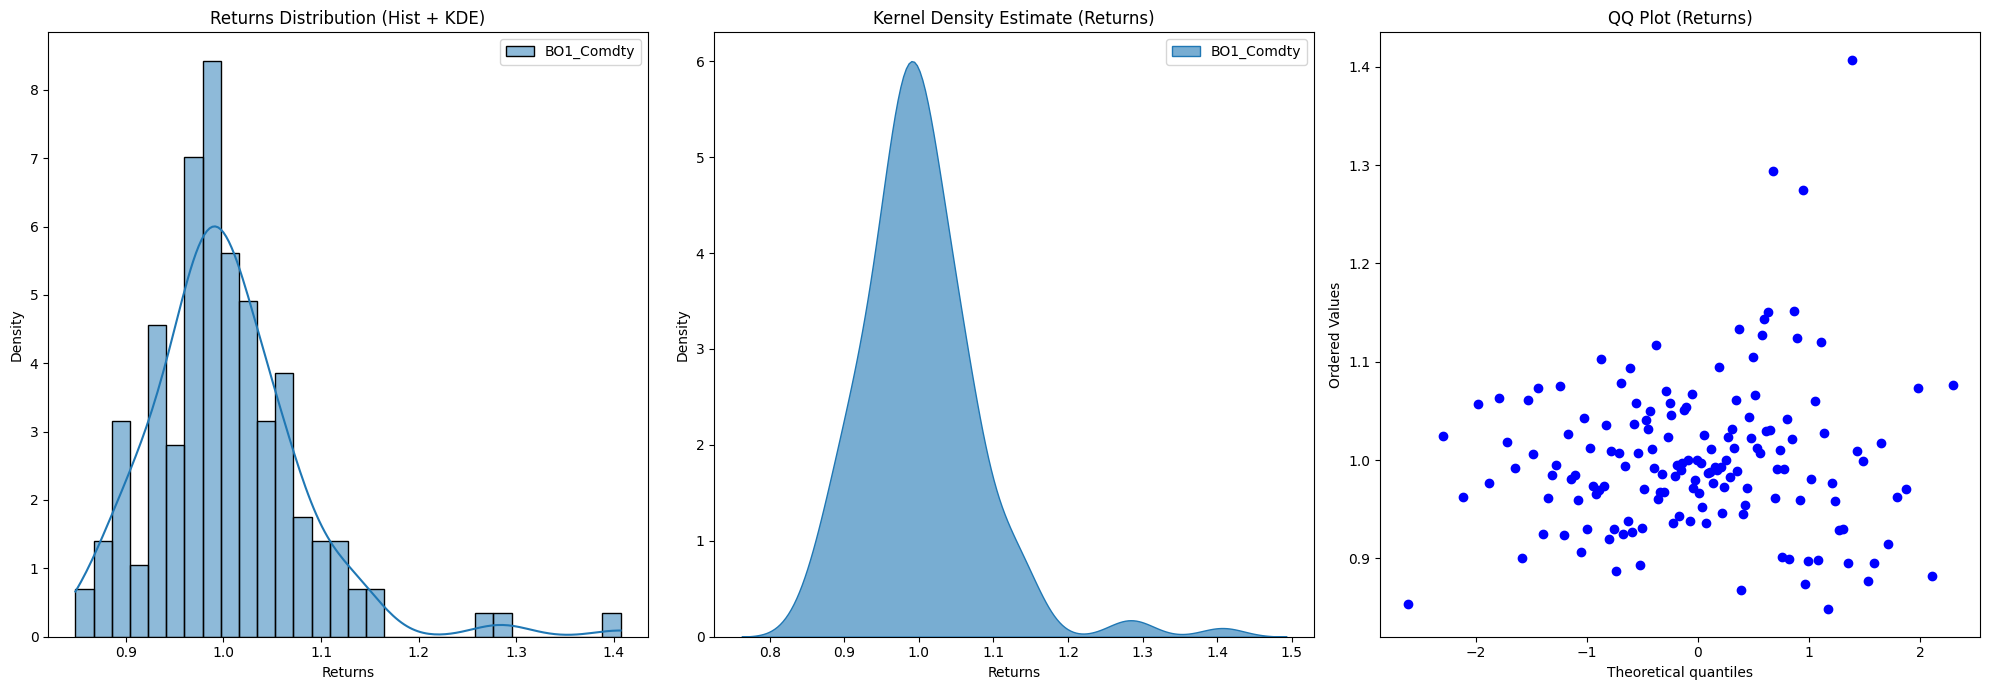

In [13]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
sns.histplot(returns, bins=30, kde=True, color='steelblue', stat="density")
plt.title('Returns Distribution (Hist + KDE)')
plt.xlabel('Returns')
plt.ylabel('Density')

plt.subplot(1, 3, 2)
sns.kdeplot(returns, fill=True, color='darkred', alpha=0.6)
plt.title('Kernel Density Estimate (Returns)')
plt.xlabel('Returns')
plt.ylabel('Density')

plt.subplot(1, 3, 3)
stats.probplot(returns, dist="norm", plot=plt)
plt.title('QQ Plot (Returns)')

plt.tight_layout()
plt.show()

In [ ]:
for name, df in df_dict.items():
    print(f"Processing {name}")
    returns = df.iloc[:, 0:1].apply(lambda x: x.shift(-1) / x).dropna()
    lilliefors_result = lilliefors(returns, dist='norm')
    print(f"Lilliefors test result: {lilliefors_result}")

Processing BO
Lilliefors test result: (0.09045497038688477, 0.007326445801952434)
Processing CC
Lilliefors test result: (0.07499366036230892, 0.05297407288425901)
Processing CL
Lilliefors test result: (0.12887367468650768, 0.0009999999999998899)
Processing CO
Lilliefors test result: (0.07176281243370763, 0.0762352409382023)
Processing CT
Lilliefors test result: (0.06094576324023926, 0.23348354131490837)
Processing C_
Lilliefors test result: (0.07436815784547923, 0.057417014596406066)
Processing DA
Lilliefors test result: (0.14905696322283268, 0.0009999999999998899)
Processing FC
Lilliefors test result: (0.04435026513532503, 0.7225025120400138)
Processing GC
Lilliefors test result: (0.05896724415175991, 0.2765333714404308)
Processing HG
Lilliefors test result: (0.046069828741367586, 0.6647202125146103)
Processing HO
Lilliefors test result: (0.07883475878531918, 0.03479921678589537)
Processing JN
Lilliefors test result: (0.07479119514848986, 0.054412182435431916)
Processing JO
Lilliefors

For CC, CO, CT, C_, FC, GC, HG, HO, JN, JO, LA, LH, LL, LN, LT, LX, NG, O_, PL, QS, RR, RS, SB, SI, SM, S_, W_, XB, p-values of Lilliefors test are larger than 1%, which means there are not sufficient evidence to reject the null hypothesis.

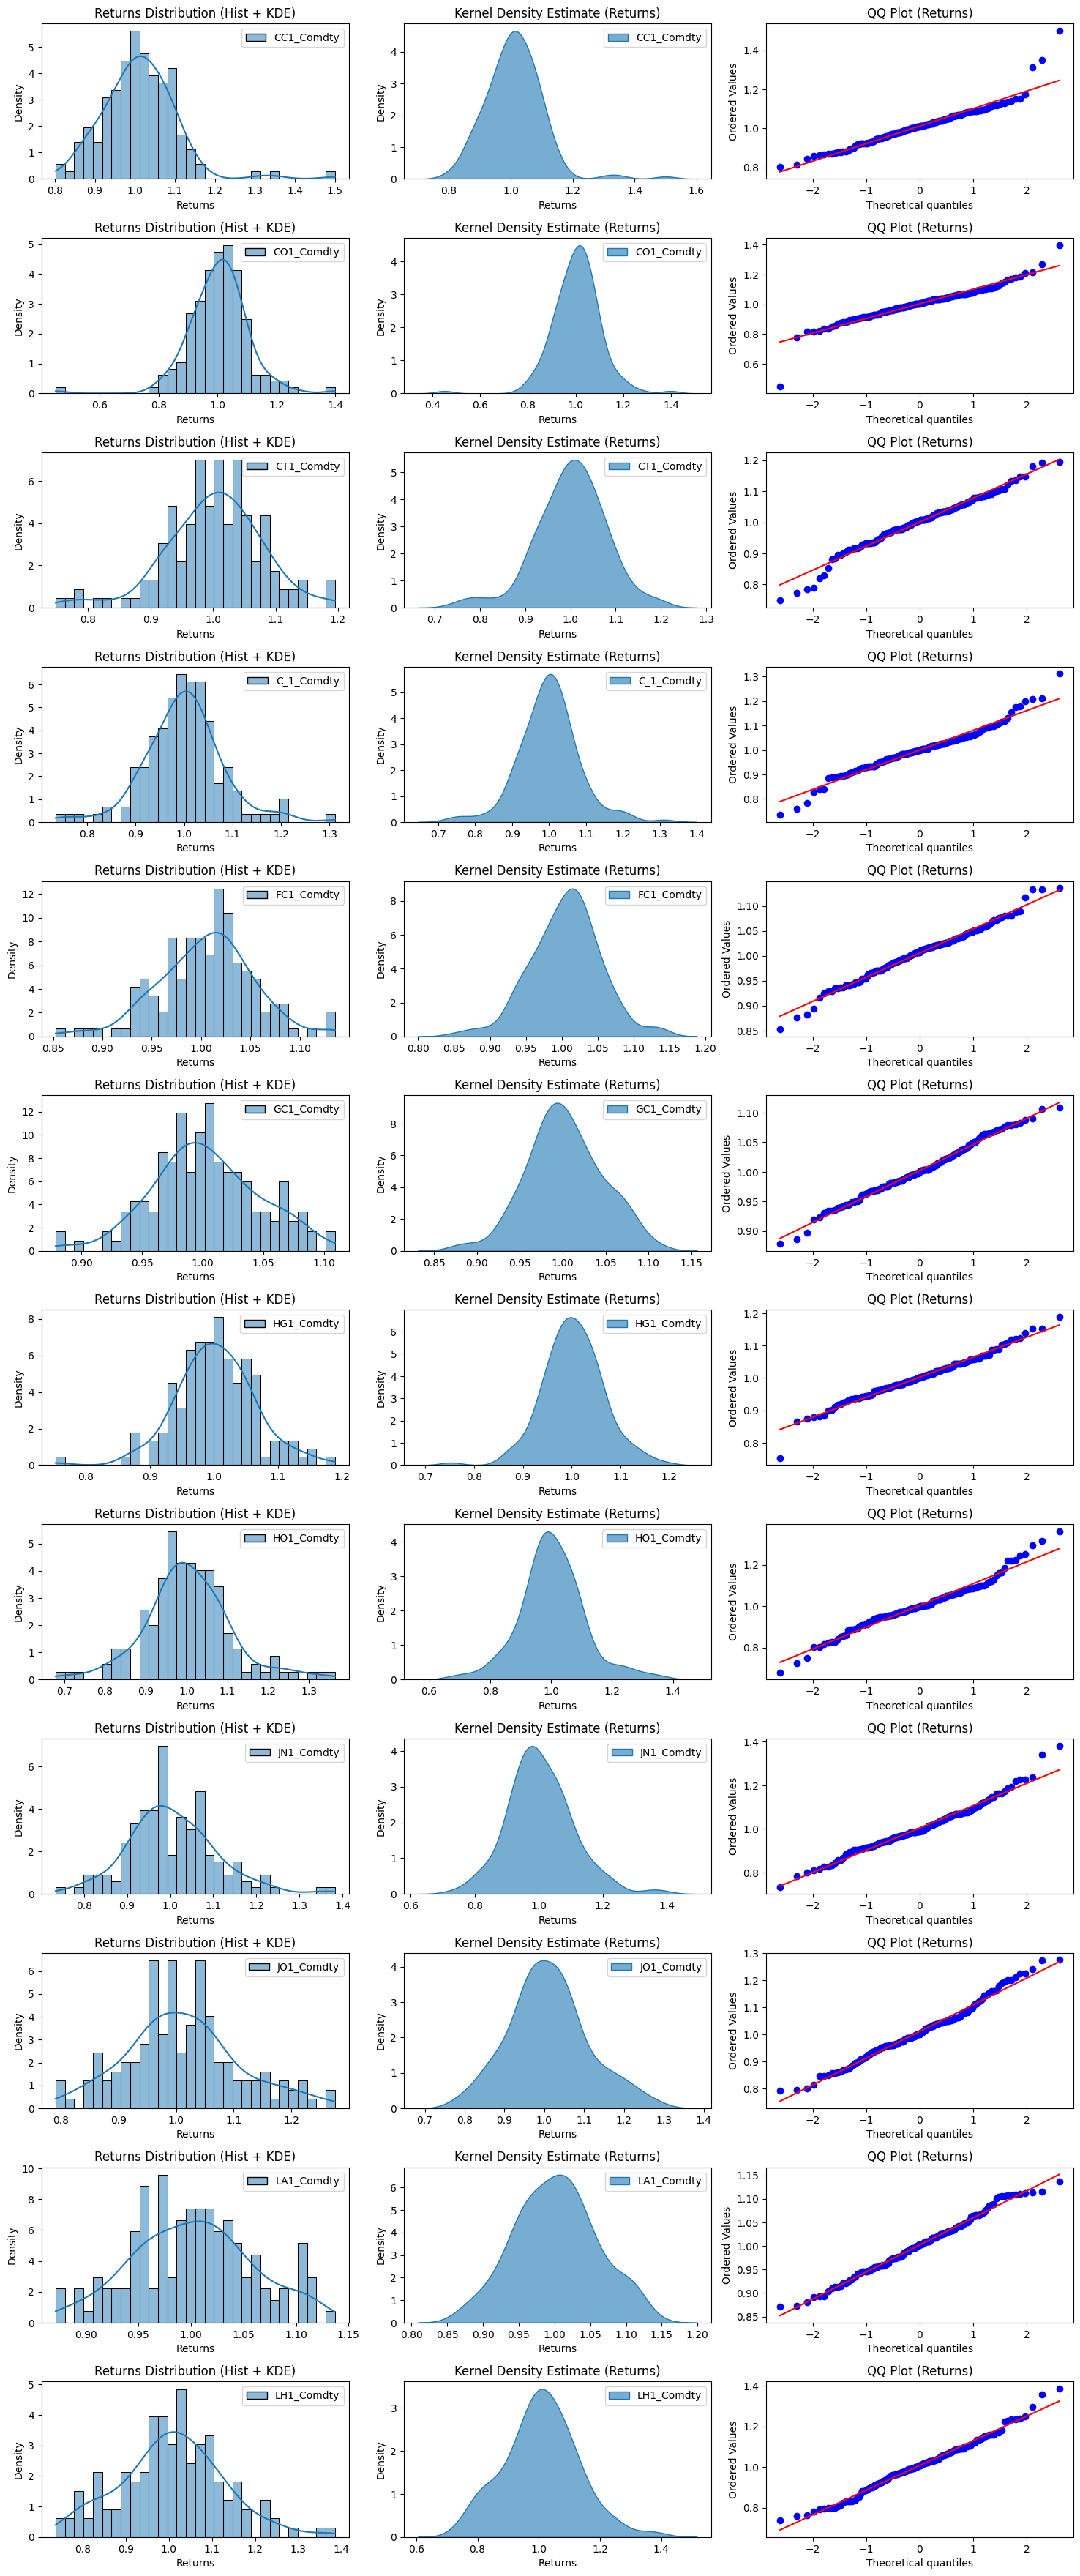

In [ ]:
plt.figure(figsize=(15, 70))
list_ = ["CC", "CO", "CT", "C_", "FC", "GC", "HG", "HO", "JN", "JO", "LA", "LH"]
for idx, name in enumerate(list_):
    df = df_dict[name]
    returns = df.iloc[:, 0:1].apply(lambda x: x.shift(-1) / x).dropna()
    plt.subplot(24, 3, idx * 3 + 1)
    sns.histplot(returns, bins=30, kde=True, color='steelblue', stat="density")
    plt.title('Returns Distribution (Hist + KDE)')
    plt.xlabel('Returns')
    plt.ylabel('Density')

    plt.subplot(24, 3, idx * 3 + 2)
    sns.kdeplot(returns, fill=True, color='darkred', alpha=0.6)
    plt.title('Kernel Density Estimate (Returns)')
    plt.xlabel('Returns')
    plt.ylabel('Density')

    plt.subplot(24, 3, idx * 3 + 3)
    stats.probplot(returns.values.flatten(), dist="norm", plot=plt)
    plt.title('QQ Plot (Returns)')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 70))
list_ = ["LL", "LN", "LT", "LX", "NG", "O_", "PL", "QS", "RR", "RS", "SB", "SI", "SM", "S_", "W_", "XB"]
for idx, name in enumerate(list_):
    df = df_dict[name]
    returns = df.iloc[:, 0]
    plt.subplot(24, 3, idx * 3 + 1)
    sns.histplot(returns, bins=30, kde=True, color='steelblue', stat="density")
    plt.title('Returns Distribution (Hist + KDE)')
    plt.xlabel('Returns')
    plt.ylabel('Density')

    plt.subplot(24, 3, idx * 3 + 2)
    sns.kdeplot(returns, fill=True, color='darkred', alpha=0.6)
    plt.title('Kernel Density Estimate (Returns)')
    plt.xlabel('Returns')
    plt.ylabel('Density')

    plt.subplot(24, 3, idx * 3 + 3)
    stats.probplot(returns, dist="norm", plot=plt)
    plt.title('QQ Plot (Returns)')

plt.tight_layout()
plt.show()

### Taking Logarithm

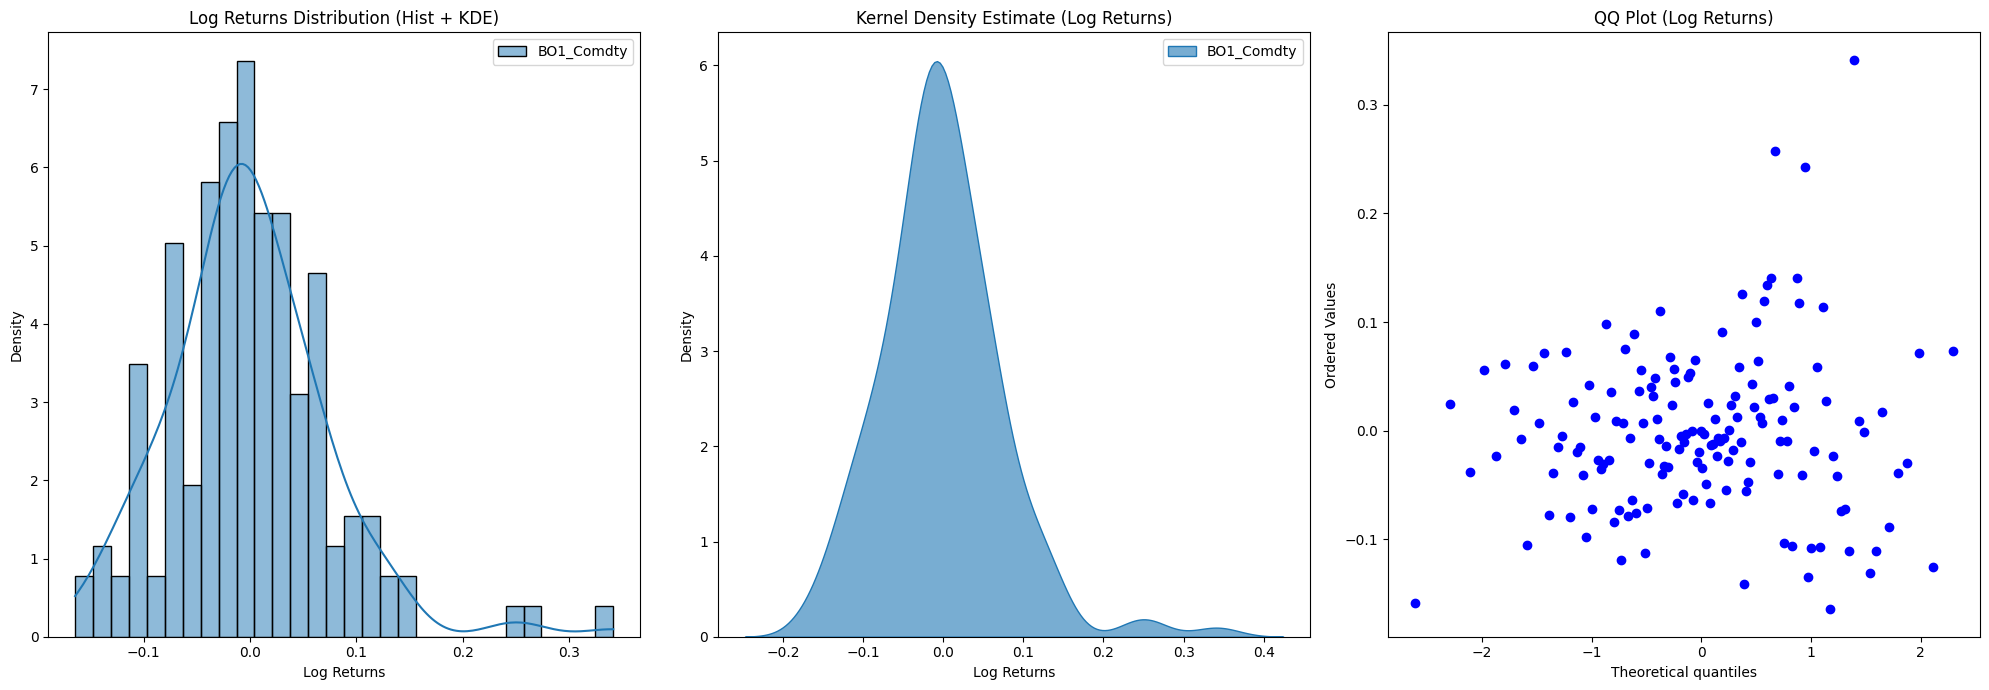

In [ ]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
sns.histplot(log_returns, bins=30, kde=True, color='steelblue', stat="density")
plt.title('Log Returns Distribution (Hist + KDE)')
plt.xlabel('Log Returns')
plt.ylabel('Density')
log_returns
plt.subplot(1, 3, 2)
sns.kdeplot(log_returns, fill=True, color='darkred', alpha=0.6)
plt.title('Kernel Density Estimate (Log Returns)')
plt.xlabel('Log Returns')
plt.ylabel('Density')

plt.subplot(1, 3, 3)
stats.probplot(log_returns, dist="norm", plot=plt)
plt.title('QQ Plot (Log Returns)')

plt.tight_layout()
plt.show()

### Taking Logarithm

In [ ]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
sns.histplot(log_returns, bins=30, kde=True, color='steelblue', stat="density")
plt.title('Log Returns Distribution (Hist + KDE)')
plt.xlabel('Log Returns')
plt.ylabel('Density')
log_returns
plt.subplot(1, 3, 2)
sns.kdeplot(log_returns, fill=True, color='darkred', alpha=0.6)
plt.title('Kernel Density Estimate (Log Returns)')
plt.xlabel('Log Returns')
plt.ylabel('Density')

plt.subplot(1, 3, 3)
stats.probplot(log_returns, dist="norm", plot=plt)
plt.title('QQ Plot (Log Returns)')

plt.tight_layout()
plt.show()

## Lilliefors-corrected Kolmogorov-Smirnov Test

When parameters of the distribution are unknown, a correction to Kolmogorov-Smirnov Test is necessary to account for additional uncertainty of parameter estimation.  
  
H_0: Z_n is normally distributed  
H_1: Z_n is not normally distributed

In [ ]:
for name, df in df_dict.items():
    print(f"Processing {name}")
    returns = df.iloc[:, 0:1].apply(lambda x: x.shift(-1) / x).dropna()
    lilliefors_result = lilliefors(returns, dist='norm')
    print(f"Lilliefors test result: {lilliefors_result}")

Processing BO
Lilliefors test result: (0.09045497038688477, 0.007326445801952434)
Processing CC
Lilliefors test result: (0.07499366036230892, 0.05297407288425901)
Processing CL
Lilliefors test result: (0.12887367468650768, 0.0009999999999998899)
Processing CO
Lilliefors test result: (0.07176281243370763, 0.0762352409382023)
Processing CT
Lilliefors test result: (0.06094576324023926, 0.23348354131490837)
Processing C_
Lilliefors test result: (0.07436815784547923, 0.057417014596406066)
Processing DA
Lilliefors test result: (0.14905696322283268, 0.0009999999999998899)
Processing FC
Lilliefors test result: (0.04435026513532503, 0.7225025120400138)
Processing GC
Lilliefors test result: (0.05896724415175991, 0.2765333714404308)
Processing HG
Lilliefors test result: (0.046069828741367586, 0.6647202125146103)
Processing HO
Lilliefors test result: (0.07883475878531918, 0.03479921678589537)
Processing JN
Lilliefors test result: (0.07479119514848986, 0.054412182435431916)
Processing JO
Lilliefors

For CC, CO, CT, C_, FC, GC, HG, HO, JN, JO, LA, LH, LL, LN, LT, LX, NG, O_, PL, QS, RR, RS, SB, SI, SM, S_, W_, XB, p-values of Lilliefors test are larger than 1%, which means there are not sufficient evidence to reject the null hypothesis.

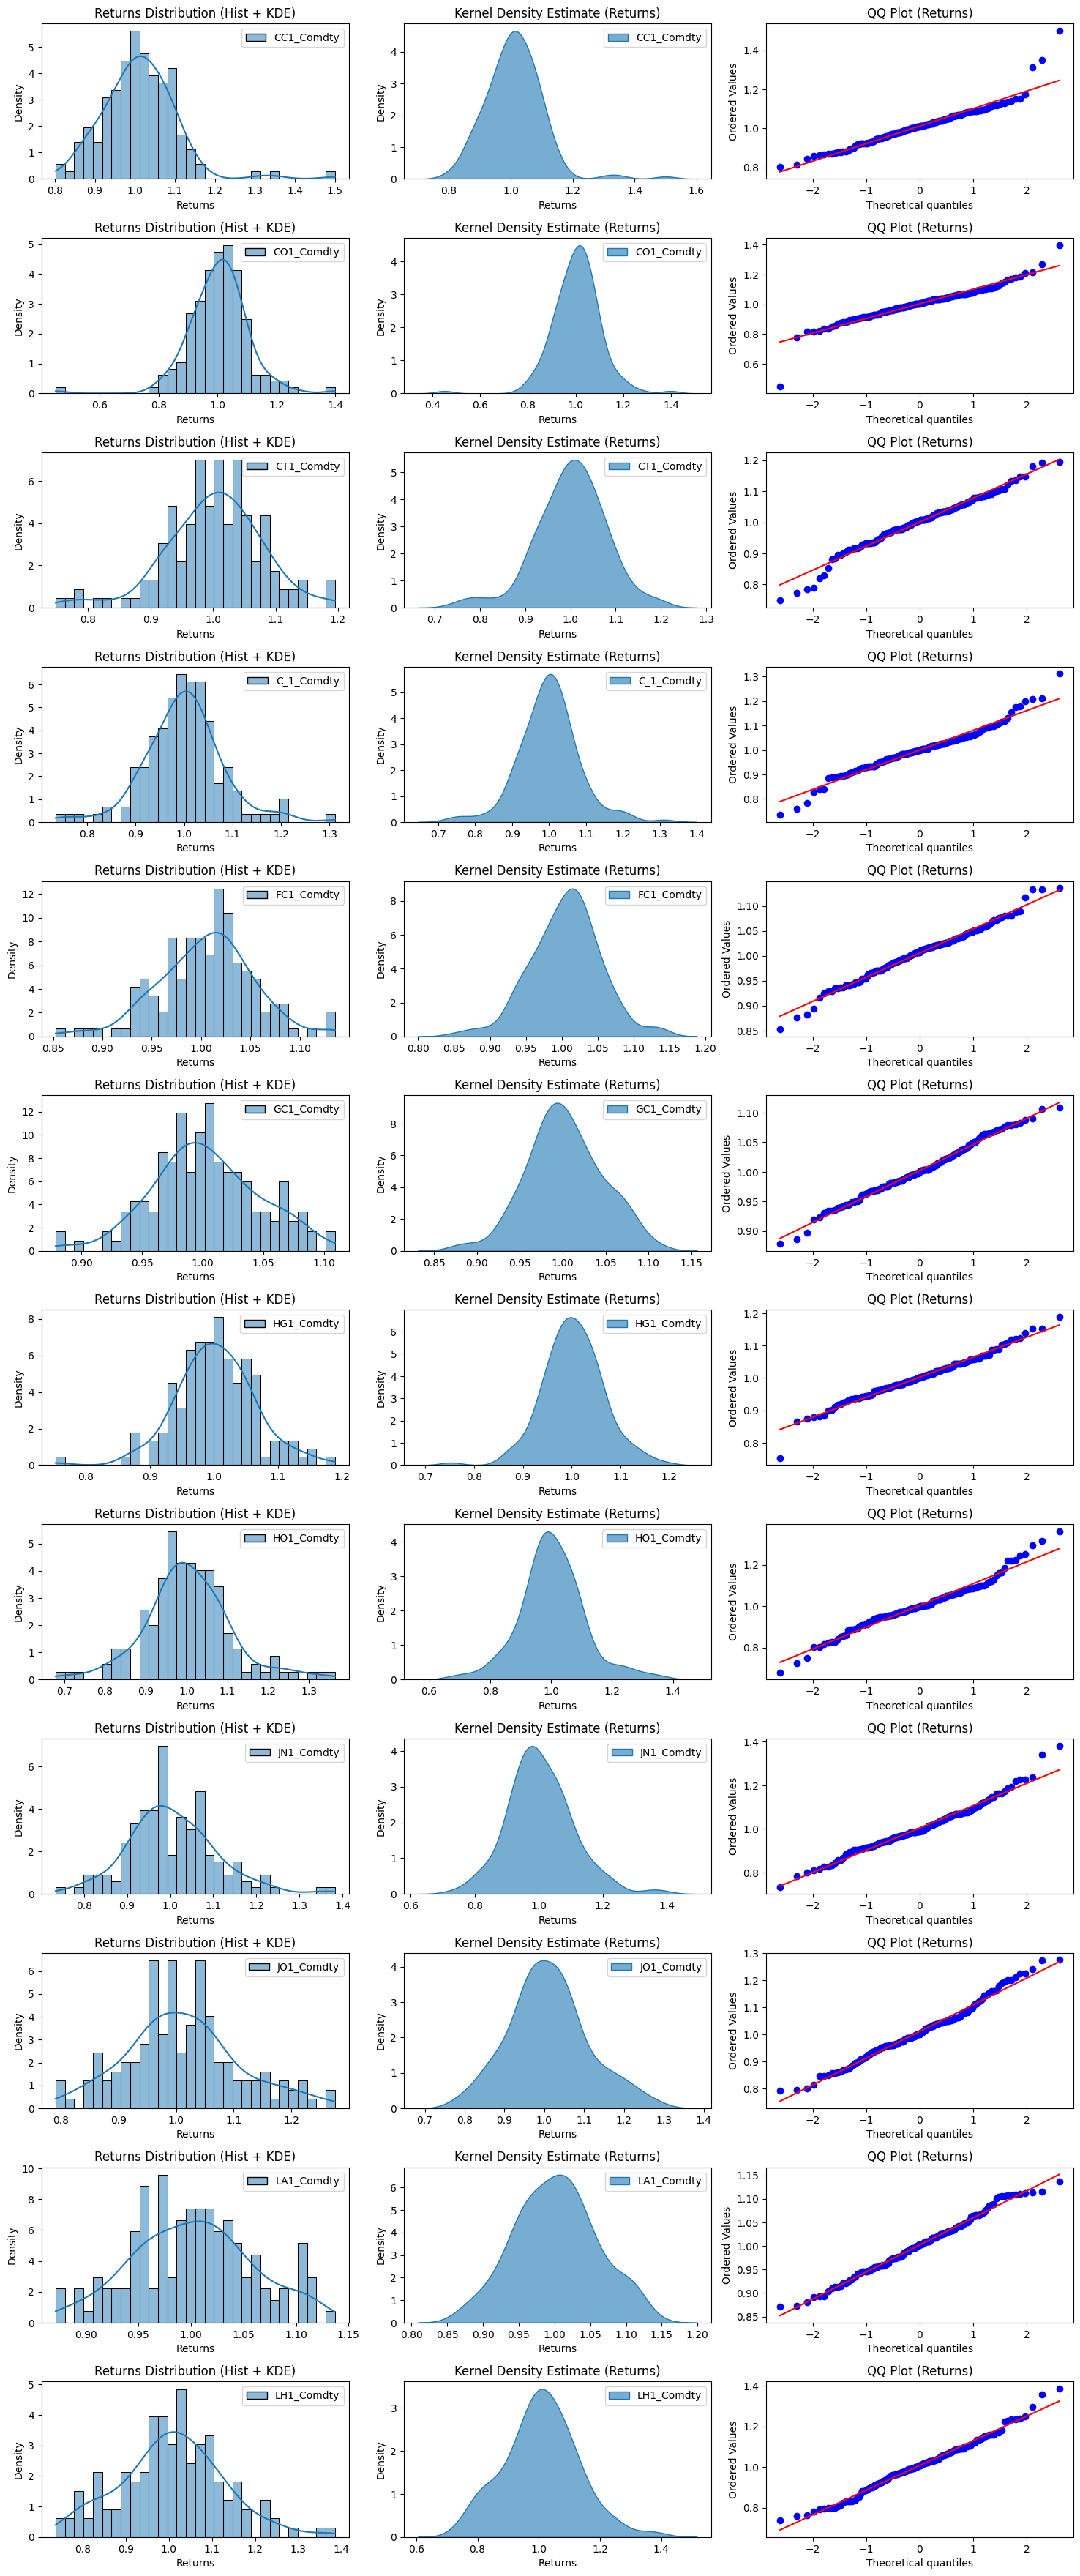

In [240]:
plt.figure(figsize=(15, 70))
list_ = ["CC", "CO", "CT", "C_", "FC", "GC", "HG", "HO", "JN", "JO", "LA", "LH"]
for idx, name in enumerate(list_):
    df = df_dict[name]
    returns = df.iloc[:, 0:1].apply(lambda x: x.shift(-1) / x).dropna()
    plt.subplot(24, 3, idx * 3 + 1)
    sns.histplot(returns, bins=30, kde=True, color='steelblue', stat="density")
    plt.title('Returns Distribution (Hist + KDE)')
    plt.xlabel('Returns')
    plt.ylabel('Density')

    plt.subplot(24, 3, idx * 3 + 2)
    sns.kdeplot(returns, fill=True, color='darkred', alpha=0.6)
    plt.title('Kernel Density Estimate (Returns)')
    plt.xlabel('Returns')
    plt.ylabel('Density')

    plt.subplot(24, 3, idx * 3 + 3)
    stats.probplot(returns.values.flatten(), dist="norm", plot=plt)
    plt.title('QQ Plot (Returns)')

plt.tight_layout()
plt.show()

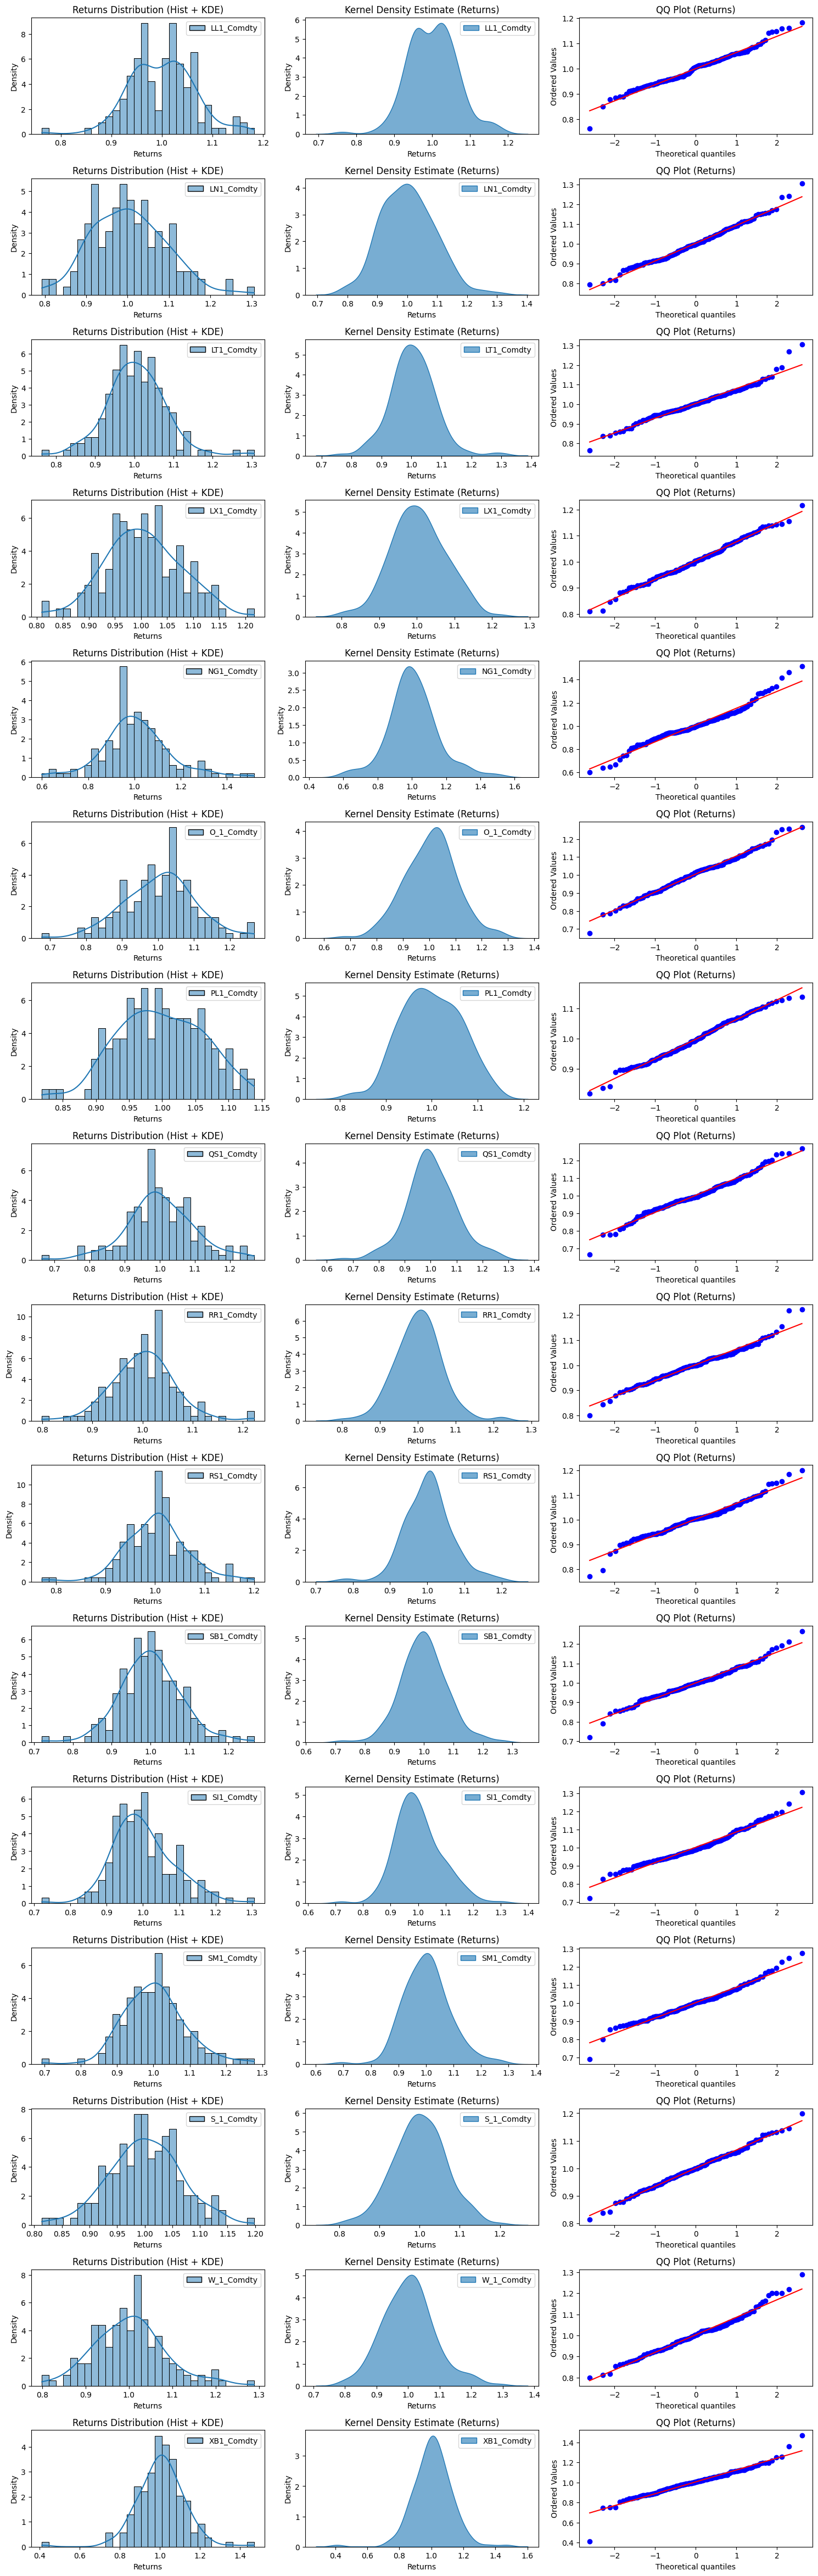

In [242]:
plt.figure(figsize=(15, 70))
list_ = ["LL", "LN", "LT", "LX", "NG", "O_", "PL", "QS", "RR", "RS", "SB", "SI", "SM", "S_", "W_", "XB"]
for idx, name in enumerate(list_):
    df = df_dict[name]
    returns = df.iloc[:, 0:1].apply(lambda x: x.shift(-1) / x).dropna()
    plt.subplot(24, 3, idx * 3 + 1)
    sns.histplot(returns, bins=30, kde=True, color='steelblue', stat="density")
    plt.title('Returns Distribution (Hist + KDE)')
    plt.xlabel('Returns')
    plt.ylabel('Density')

    plt.subplot(24, 3, idx * 3 + 2)
    sns.kdeplot(returns, fill=True, color='darkred', alpha=0.6)
    plt.title('Kernel Density Estimate (Returns)')
    plt.xlabel('Returns')
    plt.ylabel('Density')

    plt.subplot(24, 3, idx * 3 + 3)
    stats.probplot(returns.values.flatten(), dist="norm", plot=plt)
    plt.title('QQ Plot (Returns)')

plt.tight_layout()
plt.show()

Even that these commodities' return did pass the Lilliefors normality test, it can be observed in the QQ plot that left tail points are slightly down to the diagonal, while right tail points are slightly up to the diagonal (and slightly more deviation comparing to left tail).  
Thus, taking logarithm might be into consideration for influence of extreme values.